In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
# For plotting confusion matrix
import seaborn as sns
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Repeat previous lab

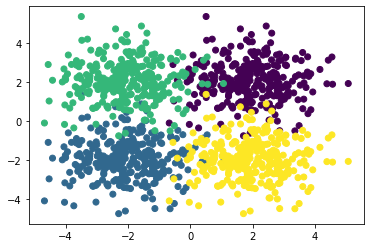

In [2]:
N = 300
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2, 2])
cloud2 = noise + np.array([-2, -2])
cloud3 = noise + np.array([-2, 2])
cloud4 = noise + np.array([2, -2])

data = np.vstack([cloud1, cloud2, cloud3, cloud4])

annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotation4 = [3]*N
annotations = annotation1 + annotation2 + annotation3 + annotation4

plt.scatter(data[:,0], data[:,1], c=annotations)

In [3]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

model = GaussianNB()
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)

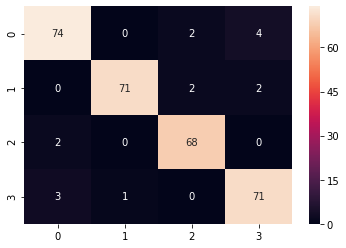

In [4]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True)

## Continue third lab

## Metrics

A __false positive error__, or in short a __false positive (FP)__, commonly called a "false alarm", is a result 
that indicates a given condition exists, when it does not.
*A false positive error is a type I error.*

A __false negative error__, or in short a __false negative(FN)__, is a test result that indicates that a condition does
not hold, while in fact it does.
*A false negative error is a type II error.*

__True positive (TP)__ - correctly identified.

__False positive (FN)__ - incorrectly identified.

*Example:*

Imagine a study evaluating a new test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). The test results for each subject may or may not match the subject's actual status. In that setting:

    True positive: Sick people correctly identified as sick
    False positive: Healthy people incorrectly identified as sick
    True negative: Healthy people correctly identified as healthy
    False negative: Sick people incorrectly identified as healthy

#### Accuracy
$$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [6]:
accuracy_score(Ytest, pred) * 100

94.66666666666667

### Precision, recall and f1-score

$$\large precision = \frac{TP}{TP + FP}$$
$$\large recall = \frac{TP}{TP + FN}$$
$$\large \ F = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [7]:
report = classification_report(Ytest, pred)

In [8]:
# (Support - count of data of class in selection)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.99      0.95      0.97        75
           2       0.94      0.97      0.96        70
           3       0.92      0.95      0.93        75

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



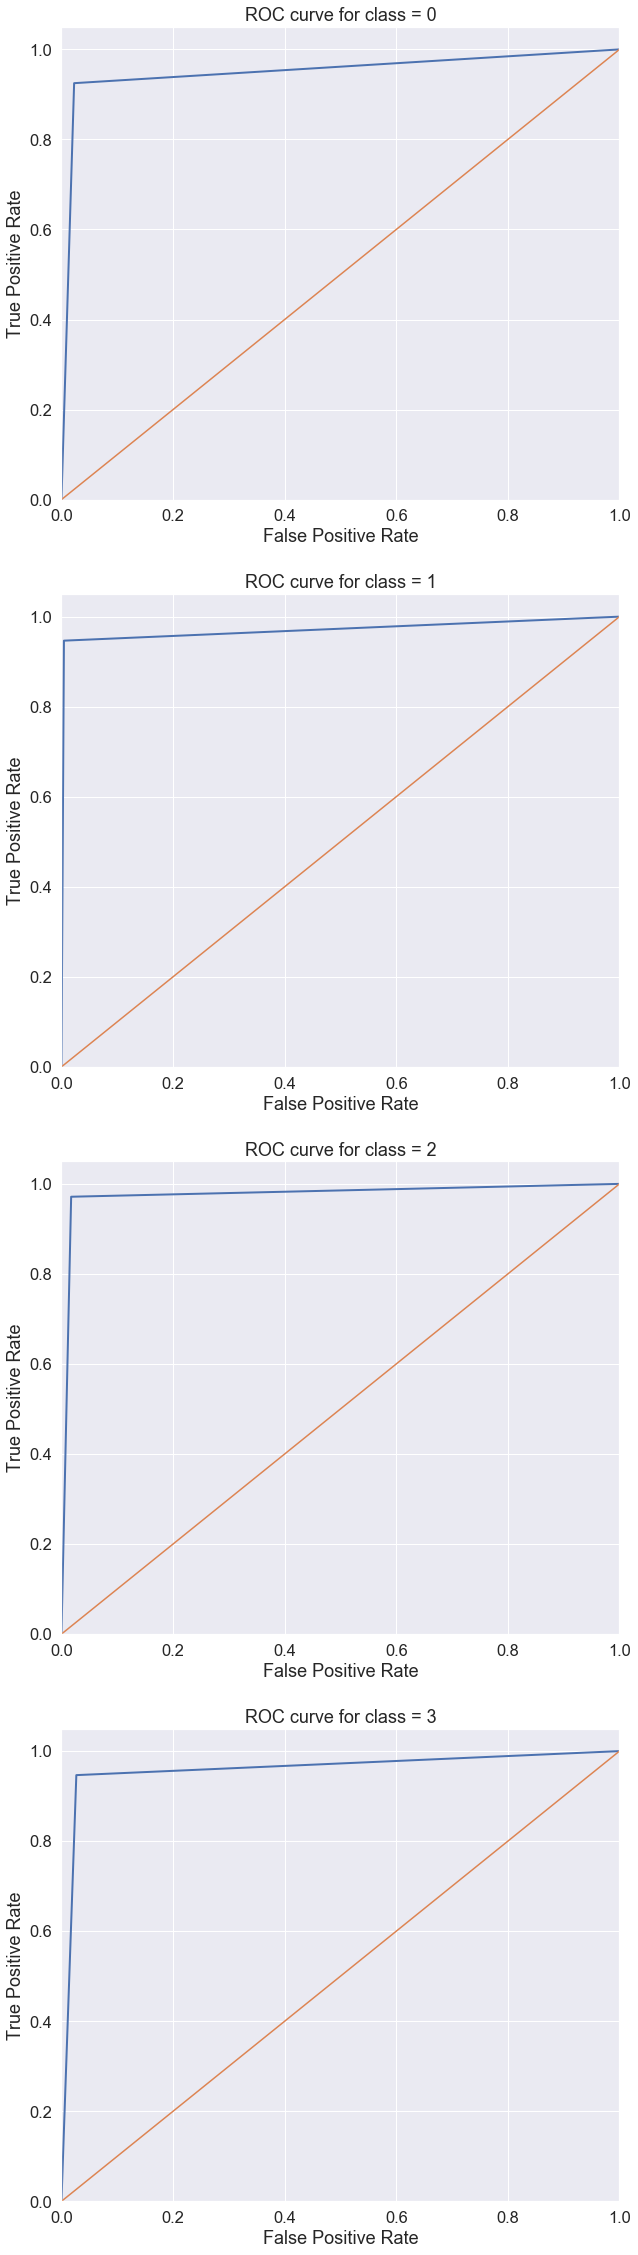

In [9]:
Ytest = np.asarray(Ytest)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

lw = 2
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 40))
for i in range(4):   
    fpr, tpr, thresholds = roc_curve(Ytest == i, pred == i, pos_label=1)
    axs[i].plot(fpr, tpr, lw=lw, label='ROC curve ')
    axs[i].plot([0, 1], [0, 1])
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC curve for class = {i}')

plt.show()

## Cross-Validation

<p>We always assess our models (NaiveBayse, neural network, etc) using validation set after training ones (the models). Generally it turnes out that the model does not fit the validation data as well as the training data. The size of that difference is likely to be large when the model is large (has too many parameters) or training set is too small. To measure this difference cross-validation is used.</p>
<p>In other words, cross-validation is a way to check how well the model generalizes to new data.</p>
<p>You did cross-validation in previous labs by splitting your data into training and validation set. This is called Holdout cross-validation and it's the most common one. There are other types of cross-validation that allow you to asses your model more accurately.</p>
<p>The Holdout cross-validation is a good choice if your data is uniform in terms of distribution and 'difficulty'. But if it's not the case, you can encounter a situtation when accross different training cycles your model performs differently. In this case in order to correctly assess your model other types of cross-validation must be used.</p>

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris

In [11]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris_data['data'].shape

(150, 4)

In [14]:
model = DecisionTreeClassifier()

In [15]:
# The simples way to do cross-validation.
# Train the model `cv` times and see its performance on different runs.
# Check the link below for documentation to see how data is splitted inside the method.
cvs = cross_val_score(model, iris_data['data'], iris_data['target'], cv=8)
cvs

array([1.        , 0.94736842, 1.        , 0.89473684, 0.89473684,
       1.        , 1.        , 1.        ])

In [16]:
# Cross-validate using different metrics.
# Define metrics we are interested in.
# Available scores for cross_validate: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metrics = ['precision_macro', 'recall_macro', 'f1_macro']

In [17]:
cv = cross_validate(model, data, annotations, scoring=metrics, return_train_score=True)
cv

{'fit_time': array([0.00100136, 0.00100088, 0.00200176, 0.00100136, 0.00200152]),
 'score_time': array([0.002002  , 0.00200224, 0.002002  , 0.002002  , 0.00200176]),
 'test_precision_macro': array([0.9269114 , 0.91669964, 0.93986323, 0.91816103, 0.93780932]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.925     , 0.91666667, 0.9375    , 0.91666667, 0.9375    ]),
 'train_recall_macro': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.9249407 , 0.91658729, 0.93745159, 0.91613295, 0.93749045]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [18]:
# Use the following link to see more advanced ways of cross-validation:
# https://scikit-learn.org/stable/modules/cross_validation

## Hyperparameters Tuning

<p>Hyperparameters are the parameters that are not learned during training process but chosen by an engineer. An example of hyperparamer can be depth of a decision tree, number of neurons in a neural network or kernel in an SVM. Optimal hyperparameters vary from model to model, dataset to dataset and finding ones that suits your case the best is not an easy task.</p>
<p>There are several ways to search for the optimal hyperparameters:</p>
<p>1) Grid search</p>
<p>2) Random search</p>

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [20]:
# Grid search
# Do an exhaustive search in a space of the hyperparameters you're interested in.
# Train model with all possible combinations and choose the best one.
max_depth = [3, 4, 5, 6, 7]
max_leaf_nodes = [2, 3, 4, 5]
criterion = ['gini', 'entropy']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(iris_data['data'], iris_data['target'], test_size=0.25)

best_score = 0
best_hps = None
for hp1 in max_depth:
    for hp2 in max_leaf_nodes:
        for hp3 in criterion:
            model = DecisionTreeClassifier(criterion=hp3, max_leaf_nodes=hp2, max_depth=hp1)
            model.fit(Xtrain, Ytrain)
            score = model.score(Xtest, Ytest)
            if score > best_score:
                best_score = score
                best_hps = {'depth': hp1, 'mln': hp2, 'crit': hp3}
                
print(best_score)
print(best_hps)

0.9210526315789473
{'depth': 3, 'mln': 4, 'crit': 'gini'}


In [21]:
# Grid search Sci-Kit learn
model = DecisionTreeClassifier()

max_depth = [3, 4, 5, 6, 7]
max_leaf_nodes = [2, 3, 4, 5]
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion
}

g_search = GridSearchCV(
    estimator=model,
    param_grid=parameters
)


_ = g_search.fit(iris_data['data'], iris_data['target'])
print('Results:', g_search.best_params_ )
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV
# Use this link to see other attributes of the GridSearchCV object.

Results: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}


In [22]:
# Random search
# In random search instead of passing in all hyperparameters' values to try,
# you pass in the distribution of the parameters.

def random_sample(low, high):
    return np.random.randint(low=low, high=high+1)


max_depth_distr = (3, 7)
max_leaf_nodes_distr = (2,  5)
criterion = ['gini', 'entropy']

search_iter = 15
best_score = 0
best_hps = None
for i in range(search_iter):
    # Sample parameters
    hp1 = random_sample(*max_depth_distr)
    hp2 = random_sample(*max_leaf_nodes_distr)
    hp3 = np.random.choice(criterion)
    
    model = DecisionTreeClassifier(criterion=hp3, max_leaf_nodes=hp2, max_depth=hp1)
    model.fit(Xtrain, Ytrain)
    score = model.score(Xtest, Ytest)
    if score > best_score:
        best_score = score
        best_hps = {'depth': hp1, 'mln': hp2, 'crit': hp3}

print(best_score)
print(best_hps)

0.9210526315789473
{'depth': 3, 'mln': 4, 'crit': 'gini'}


## Task

<p>Given the data, train KNeighborsClassifier and DecisionTreeClassifier. Find optimal parameters for the classifiers using grid search and random search. Use cross-validation to assess parameters you found. Calculate F1-Score, precision and recall for each class. Make conclusion about which type of search works better for this case.</p>

<p>Even variant - find such parameters for the models, so that they minimize type 1 error.</p>
<p>Odd variant - find such parameters for the models, so that they minimize type 2 error.</p>